# Нейроинформатика. Лабораторная работа 6
### Сети Кохонена

Целью работы является исследование свойств слоя Кохонена и карты Кохонена, а также применение сетей в задаче кластеризации.

Выполнил Лисин Роман, М8О-406Б-20. Вариант 12.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

Подготовим датасет с точками (согласно варианту)

In [2]:
data = [
        [-0.4, -1.1],
        [-1.5, -0.3],
        [-1, 0.6],
        [-0.4, 1],
        [0.7, 0.2],
        [-1, 1.3],
        [-0.8, 1.2],
        [-0.9, -0.4],
        [-1.3, 0.4],
        [-1, -1.4],
        [0.6, -0.5],
        [0.4, -0.4],
]

Напишем карту Кохонена для кластеризации точек

In [3]:
class SOM():
    def __init__(self, in_features, w, h):
        self.in_features = in_features
        self.w = w
        self.h = h
        self.nodes = np.random.randn(w * h, in_features)
        self.indices = np.array([[x, y] for x in range(0, h) for y in range(0, w)])

    def update(self, input, radius, lr):
        """
        Итерация для само-организующейся карты Кохонена
        radius, lr - радиус и скорость обучения
        """
        # ищем индекс узла, который лучше всего матчится с инпутом (BMU - best matching unit)
        distances_to_input = np.linalg.norm(self.nodes - input, axis=1)
        bmu = np.argmin(distances_to_input)

        # ищем расстояния от bmu до остальных вершин
        distances_to_bmu = np.linalg.norm(self.indices - self.indices[bmu], axis=1)

        # обновляем узлы, расстояние до которых меньше заданного радиуса
        for node, distance in zip(self.nodes, distances_to_bmu):
            if distance < radius:
                influence = np.exp(-distance / (2 * radius))
                node += lr * influence * (input - node)

    def train(self, data, epochs, start_lr=1):
        """
        Обучение само-организующейся карты
        epochs - количество эпох обучения
        """
        start_radius = max(self.w, self.h) // 2
        radius_decrease = epochs / np.log(start_radius) # коэффициент для снижения радиуса после каждой эпохи
        for epoch in tqdm(range(epochs)):
            np.random.shuffle(data)
            # чем больше эпоха, тем меньший радиус и лернинг рейт
            radius = start_radius * np.exp(-epoch / radius_decrease)
            lr = start_lr * np.exp(-epoch / epochs)
            for elem in data:
                self.update(elem, radius, lr)

Обучим карту размером 50х50

In [4]:
model = SOM(in_features=2, w=50, h=50)

In [5]:
model.train(data=data, epochs=150, start_lr=1)

100%|██████████| 150/150 [00:10<00:00, 14.87it/s]


Посмотрим на результат кластеризации. Значения в вершинах нормируем, чтобы матплотлиб смог корректно их отобразить

In [6]:
nodes = model.nodes

nodes_min = np.min(nodes, axis=0)
nodes_max = np.max(nodes, axis=0)

nodes_scaled = ((nodes - nodes_min) / (nodes_max - nodes_min)).reshape((model.h, model.w, model.in_features))

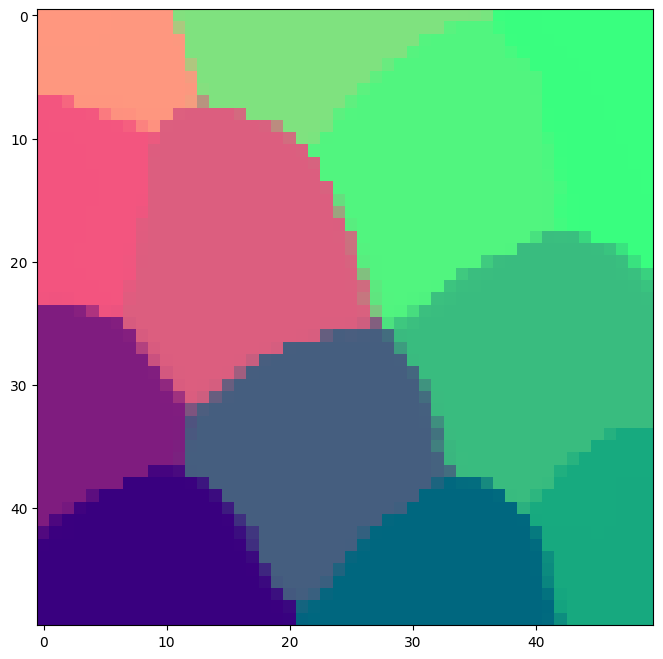

In [7]:
plt.figure(figsize=(15, 8))

plt.imshow(np.insert(nodes_scaled, 2, 0.5, axis = 2)) # добавляем измерение, чтобы матплотлиб нарисовал цветную картинку

plt.show()

### Вывод

В данной лабораторной работе я изучил и реализовал самоорганизующуюся карту Кохонена и решил с ее помощью задачу кластеризации плоскости. Результат получился достаточно правдоподобный. Плоскость разделилась на 12 частей.